# BAKERY TRANSACTION ANALYSIS

In [ ]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#Importing file
df=pd.read_csv(r'C:\Users\HP\OneDrive\Documents\Python Scripts\Bakery.csv')

In [2]:
df

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


In [3]:
#Knowing the dataset
df.shape

(20507, 5)

In [4]:
df.isnull()

,TransactionNo,Items,DateTime,Daypart,DayType
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
20502,False,False,False,False,False
20503,False,False,False,False,False
20504,False,False,False,False,False
20505,False,False,False,False,False


# DATA CLEANING AND MODIFICATION


In [5]:
df.duplicated()
#duplicates found;
#Over 11620 duplicates found
#But before drop it, I checked sample duplicated data rows.sample duplicated data rows
#The duplicated data is valid data, it means the customer bought more than one same items. So it will not be drop

0        False
1        False
2         True
3        False
4        False
         ...  
20502    False
20503    False
20504    False
20505    False
20506    False
Length: 20507, dtype: bool

In [6]:
df.dtypes

TransactionNo     int64
Items            object
DateTime         object
Daypart          object
DayType          object
dtype: object

In [7]:
#SPLIITING COLUMNS TO HAVE TIME COLUMN
df[['Date','Time']]=df['DateTime'].str.split(' ',expand=True)
df

,TransactionNo,Items,DateTime,Daypart,DayType,Date,Time
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend,2016-10-30,09:58:11
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30,10:05:34
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend,2016-10-30,10:05:34
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend,2016-10-30,10:07:57
...,...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend,2017-09-04,14:32:58
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend,2017-09-04,14:32:58
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend,2017-09-04,14:57:06
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend,2017-09-04,14:57:06


In [8]:
#Droping DateTime column
df=df.drop('DateTime',axis=1)

In [9]:
#Converting Date time data type
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [10]:
#Creating column for year and month
df['Day_name'] = df['Date'].dt.day_name()
df['Month_name'] = df['Date'].dt.month_name()
df['year'] = df['Date'].dt.year

In [59]:
#Droping DateTime column
df=df.drop('Time',axis=1)


In [66]:
df

,TransactionNo,Items,Daypart,DayType,Date,Day_name,Month_name,year,Hour
0,1,Bread,Morning,Weekend,2016-10-30,Sunday,October,2016,9
1,2,Scandinavian,Morning,Weekend,2016-10-30,Sunday,October,2016,10
2,2,Scandinavian,Morning,Weekend,2016-10-30,Sunday,October,2016,10
3,3,Hot chocolate,Morning,Weekend,2016-10-30,Sunday,October,2016,10
4,3,Jam,Morning,Weekend,2016-10-30,Sunday,October,2016,10
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,Afternoon,Weekend,2017-09-04,Monday,September,2017,14
20503,9682,Tea,Afternoon,Weekend,2017-09-04,Monday,September,2017,14
20504,9683,Coffee,Afternoon,Weekend,2017-09-04,Monday,September,2017,14
20505,9683,Pastry,Afternoon,Weekend,2017-09-04,Monday,September,2017,14


# EXOLORATION

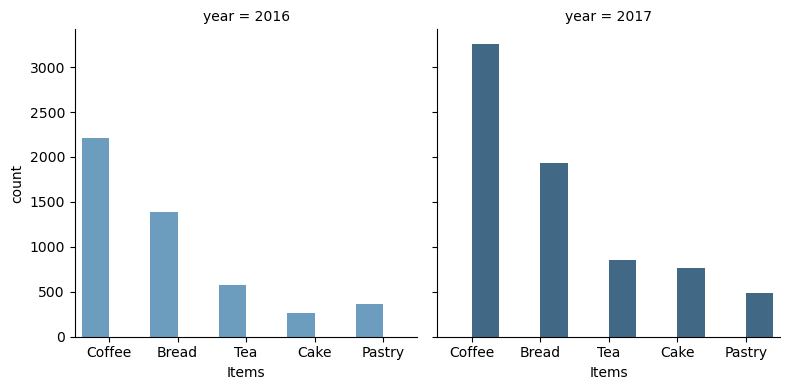

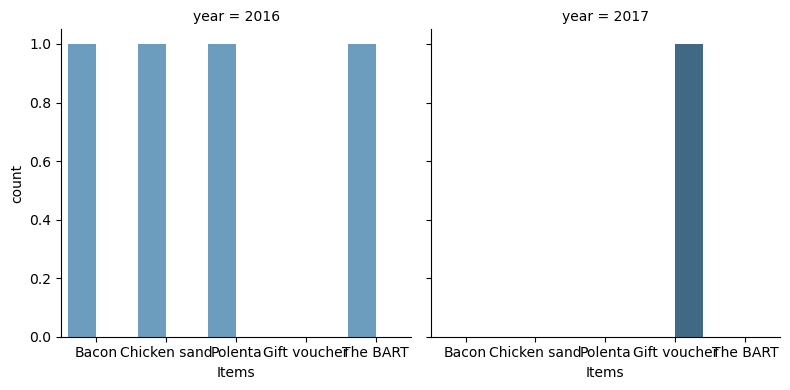

In [48]:
#Best selling products (top5)and (bottom 5)across the years
sns.catplot(kind='count',data=df,col='year',
            x='Items',order=df.Items.value_counts().iloc[:5].index,palette='Blues_d',hue='year',height=4)
sns.catplot(kind='count',data=df,col='year',
            x='Items',order=df.Items.value_counts(ascending=True).iloc[:5].index,palette='Blues_d',hue='year',height=4)


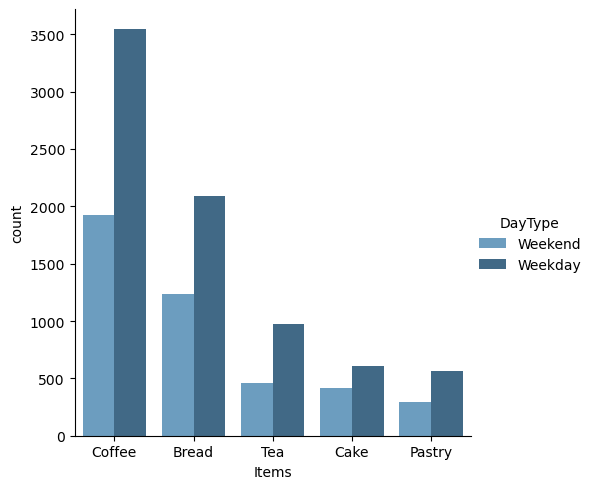

In [12]:
#Best selling item across the DayType
sns.catplot(kind='count',data=df,
            x='Items',order=df.Items.value_counts().iloc[:5].index,palette='Blues_d',hue='DayType')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Thursday'),
  Text(3, 0, 'Friday'),
  Text(4, 0, 'Wednesday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Tuesday')])

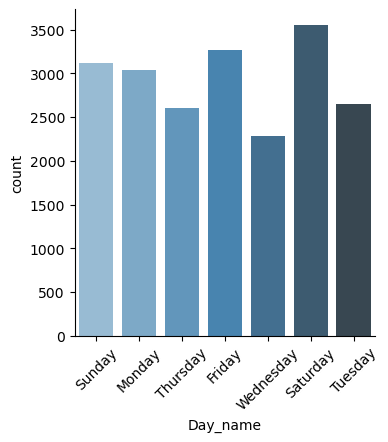

In [49]:
#Best selling items across the Day_name
sns.catplot(kind='count',data=df,
            x='Day_name',palette='Blues_d', height=4)
plt.xticks(rotation=45)

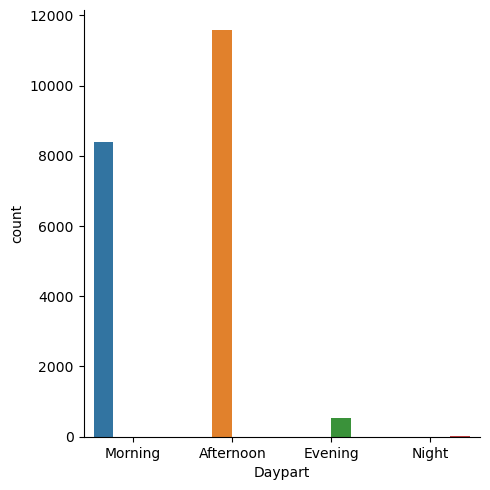

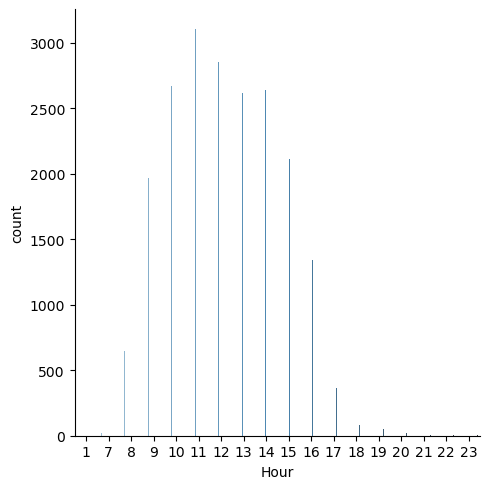

In [68]:
#Best selling time of the day
sns.catplot(kind='count',data=df,
            x='Daypart',hue='Daypart')
sns.catplot(kind='count',data=df,
            x='Hour',palette='Blues_d',hue='Hour')

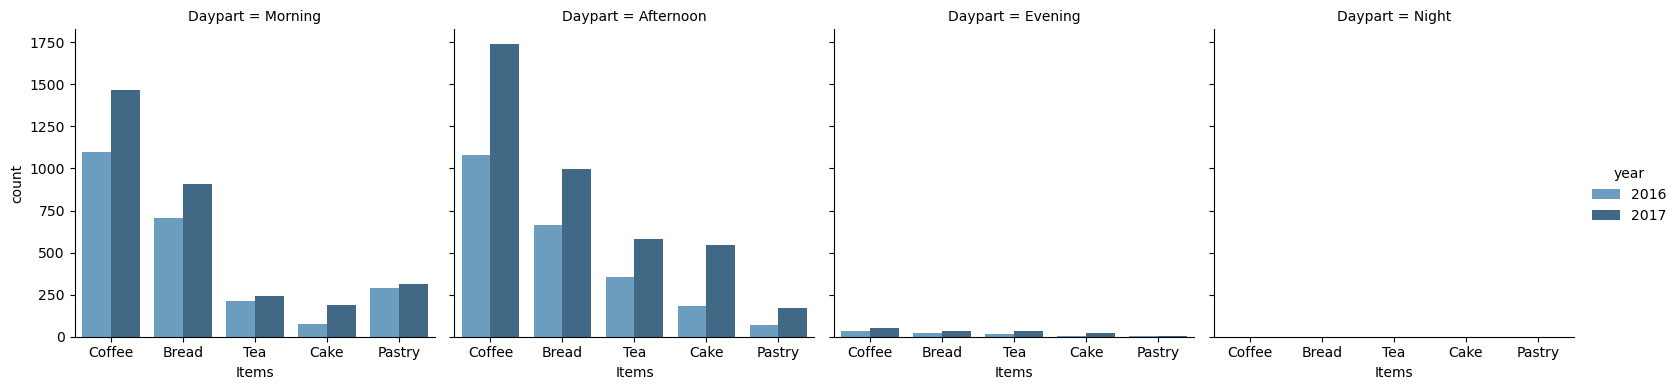

In [64]:
sns.catplot(kind='count',data=df,col='Daypart',
            x='Items',order=df.Items.value_counts().iloc[:5].index,palette='Blues_d',hue='year',height=4)


# CONCLUSION

The shift in popularity from pastry to cake between 2016 and 2017 suggests changing consumer preferences. 
Analyzing factors influencing this shift, such as marketing strategies or product innovations, could provide valuable insights 
for product development or targeted promotions; The consistently low sales for items like Beacon, Chicken, Polenta, 
and The Bat across 2016 and 2017 may suggest these items are not popular or have limited demand. However, the slight sales
for Gift Voucher in both years could indicate occasional interest

The higher sales of coffee, bread, tea items, cake, and pastries on weekdays may indicate a strong correlation with weekday
routines. Understanding the specific times of these sales could guide marketing efforts, promotions, and inventory management
to align with customer behavior during the weekdays.

The transaction pattern indicates a peak in the afternoon, particularly between 10 o'clock and 1 o'clock. 
This suggests that customers prefer purchasing these products during mid-morning and early afternoon hours.
Adjusting marketing strategies and promotions to target this time frame could potentially maximize sales.
Additionally, recognizing the lower sales at night might guide decisions related to staffing, inventory management.
The shift in sales transaction from pastry being higher in the morning to tea and cake being more popular in the afternoon 
suggests a potential variation in consumer preferences during different times of the day. 

Understanding these patterns allows for more targeted and effective business decisions.